In [8]:
import numpy as np
from scipy.optimize import minimize

NUMBER_OF_PARAMS = 30

def f(params, t): # Function that we want to optimize
    A, w = params[:NUMBER_OF_PARAMS], params[NUMBER_OF_PARAMS:]
    w = w[:, None] # Add a dimension for broadcasting
    return np.sum(A[:, None] * np.sin(w * t), axis=0)

def loss(params, t, target):
    prediction = f(params, t)
    return np.mean((prediction - target) ** 2)


params = np.array([1.0] * NUMBER_OF_PARAMS * 2)
t = np.linspace(0, 10, 100)
target = np.sin(t)

# Compute the gradient of the loss function
grad_loss = np.vectorize(lambda params: np.gradient(loss)(params, t, target))(params)
print(grad_loss)

# Optimization example using scipy.optimize
result = minimize(loss, params, args=(t, target), method='BFGS')
optimzed_params = result.x

# Comparing before and after optimization
print("Before optimization:")
for pred, targ in zip(f(params, t), target):
    print(f"Prediction: {pred}, Target: {targ}")

print("After optimization:")
for pred, targ in zip(f(optimzed_params, t), target):
    print(f"Prediction: {pred}, Target: {targ}")

print(f'Optimized parameters: {optimized_params}')


TypeError: 'list' object is not callable

In [8]:
print("Z = ",parametres_optimaux[0])
print("Ac = ", parametres_optimaux[1])
print("Wc = ", parametres_optimaux[2])
print("Lc = ", parametres_optimaux[3])

Z =  0.10625777546042935
Ac =  3.3614470473675597
Wc =  -32226.90858503952
Lc =  296.263356823104


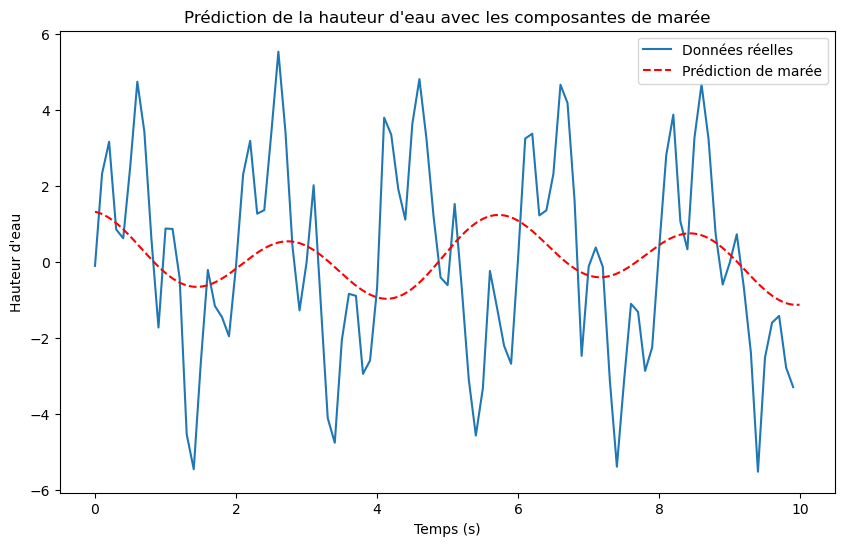

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Fonction de modèle avec une somme de cosinus basée sur les composantes de marée
def modele_marée(t, Z, *parametres):
    resultat = Z
    for i in range(0, len(parametres), 3):
        Ac = parametres[i]
        Wc = parametres[i + 1]
        Lc = parametres[i + 2]
        resultat += Ac * np.cos(Wc * t - Lc)
    return resultat

# Supposons que vous ayez les composantes de marée du site NOAA (amplitudes, fréquences, déphasages)
composantes_de_maree = [[1.0, 2.0, 0.0], [0.5, 1.5, np.pi/2]]  # Exemple de données de composantes de marée

# Estimation des paramètres du modèle à partir des composantes de marée
parametres_initiaux = [0] + [c for composante in composantes_de_maree for c in composante]
parametres_optimaux, _ = curve_fit(modele_marée, temps, hauteur_eau, p0=parametres_initiaux)

# Générer des points temporels pour la prédiction
temps_prediction = np.arange(0, 10, 0.01)

# Faire la prédiction
hauteur_eau_predite = modele_marée(temps_prediction, *parametres_optimaux)

# Afficher les résultats
plt.figure(figsize=(10, 6))
plt.plot(temps, hauteur_eau, label='Données réelles')
plt.plot(temps_prediction, hauteur_eau_predite, label='Prédiction de marée', linestyle='--', color='red')
plt.title('Prédiction de la hauteur d\'eau avec les composantes de marée')
plt.xlabel('Temps (s)')
plt.ylabel('Hauteur d\'eau')
plt.legend()
plt.show()


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Données spécifiques pour le Port San Luis, CA (hauteur d'eau moyenne, amplitudes, fréquences, déphasages)
Z = 0.0  # Hauteur d'eau moyenne
amplitudes = [0.492, 0.149, 0.113, 0.357, 0.002, 0.223, 0.0, 0.001, 0.001, 0.001, 0.022, 0.001, 0.014, 0.014,
              0.011, 0.003, 0.007, 0.013, 0.021, 0.0, 0.0, 0.07, 0.0, 0.008, 0.007, 0.04, 0.009, 0.0, 0.005,
              0.113, 0.002, 0.003, 0.008, 0.001]  # Exemple d'amplitudes
frequences = [28.984104, 30.0, 28.43973, 15.041069, 57.96821, 13.943035, 86.95232, 44.025173, 60.0, 57.423832,
               28.512583, 90.0, 27.968208, 27.895355, 16.139101, 29.455626, 15.0, 14.496694, 15.5854435, 0.5443747,
               0.0821373, 0.0410686, 1.0158958, 1.0980331, 13.471515, 13.398661, 29.958933, 30.041067, 12.854286,
               14.958931, 31.015896, 43.47616, 29.528479]  # Exemple de fréquences
dephasages = [296.3, 283.7, 276.0, 94.4, 171.0, 87.3, 0.0, 243.6, 185.1, 118.4, 282.4, 43.6, 239.6, 250.9,
               118.5, 305.9, 206.7, 114.2, 102.2, 0.0, 0.0, 190.2, 0.0, 120.5, 85.2, 84.3, 271.2, 0.0, 91.5,
               92.5, 104.1, 13.1, 293.0]  # Exemple de déphasages

# Fonction de modèle avec une somme de cosinus basée sur les composantes de marée spécifiques
def modele_marée(t, Z, *parametres):
    resultat = Z
    for i in range(0, len(parametres), 3):
        Ac = parametres[i]
        Wc = parametres[i + 1]
        Lc = parametres[i + 2]
        resultat += Ac * np.cos(Wc * t - Lc)
    return resultat

# Estimation des paramètres du modèle à partir des données spécifiques
parametres_initiaux = [Z] + [c for composante in zip(amplitudes, frequences, dephasages) for c in composante]
parametres_optimaux, _ = curve_fit(modele_marée, temps, hauteur_eau, p0=parametres_initiaux)

# Générer des points temporels pour la prédiction
temps_prediction = np.arange(0, 10, 0.01)

# Faire la prédiction
hauteur_eau_predite = modele_marée(temps_prediction, *parametres_optimaux)

# Afficher les résultats
plt.figure(figsize=(10, 6))
plt.plot(temps, hauteur_eau, label='Données réelles')
plt.plot(temps_prediction, hauteur_eau_predite, label='Prédiction de marée', linestyle='--', color='red')
plt.title('Prédiction de la hauteur d\'eau avec les composantes de marée spécifiques')
plt.xlabel('Temps (s)')
plt.ylabel('Hauteur d\'eau')
plt.legend()
plt.show()


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 20200.

Enter the path to your CSV file: hc.csv
Amplitudes: [3.52, 0.88, 0.71, 2.74, 0.07, 1.51, 0.03, 0.11, 0.0, 0.03, 0.15, 0.0, 0.11, 0.08, 0.1, 0.07, 0.05, 0.09, 0.13, 0.0, 0.11, 0.25, 0.0, 0.07, 0.05, 0.25, 0.05, 0.01, 0.03, 0.85, 0.03, 0.02, 0.15, 0.11, 0.26, 0.0, 0.04]
Frequencies: [28.984104, 30.0, 28.43973, 15.041069, 57.96821, 13.943035, 86.95232, 44.025173, 60.0, 57.423832, 28.512583, 90.0, 27.968208, 27.895355, 16.139101, 29.455626, 15.0, 14.496694, 15.5854435, 0.5443747, 0.0821373, 0.0410686, 1.0158958, 1.0980331, 13.471515, 13.398661, 29.958933, 30.041067, 12.854286, 14.958931, 31.015896, 43.47616, 29.528479, 42.92714, 30.082138, 115.93642, 58.984104]
Phases: [138.7, 157.0, 113.2, 156.6, 96.4, 143.0, 337.9, 85.8, 0.0, 74.6, 126.7, 0.0, 12.8, 85.5, 199.7, 172.7, 284.2, 203.8, 190.5, 0.0, 230.4, 292.5, 0.0, 131.7, 138.8, 142.7, 157.4, 157.6, 148.6, 156.9, 34.4, 354.5, 179.8, 63.2, 157.2, 0.0, 118.0]


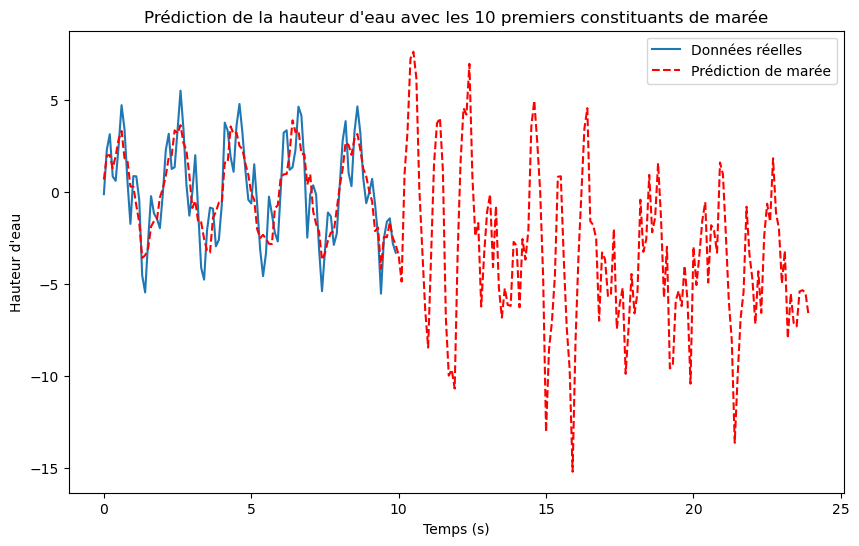

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv
# Données spécifiques pour le Port San Luis, CA (hauteur d'eau moyenne, amplitudes, fréquences, déphasages)
Z = 0.0  # Hauteur d'eau moyenne


def extract_data_from_csv():
    csv_file = input("Enter the path to your CSV file: ")
    amplitudes = []
    frequencies = []
    phases = []

    with open(csv_file, 'r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            amplitude = float(row['Amplitude'])
            phase = float(row['Phase'])
            speed = float(row['Speed'])

            amplitudes.append(amplitude)
            frequencies.append(speed)
            phases.append(phase)

    return amplitudes, frequencies, phases

# Example usage:
amplitudes, frequencies, phases = extract_data_from_csv()

print("Amplitudes:", amplitudes)
print("Frequencies:", frequencies)
print("Phases:", phases)

# Fonction de modèle avec une somme de cosinus basée sur les composantes de marée spécifiques
def modele_marée(t, Z, *parametres):
    resultat = Z
    for i in range(0, len(parametres), 3):
        Ac = parametres[i]
        Wc = 2*3.14*(parametres[i + 1])/360
        Lc = parametres[i + 2]
        resultat += Ac * np.cos(Wc * (t/3600) - Lc)
    return resultat

# Estimation des paramètres du modèle à partir des données spécifiques
parametres_initiaux = [Z] + [c for composante in zip(amplitudes, frequences, dephasages) for c in composante]
parametres_optimaux, _ = curve_fit(modele_marée, temps, hauteur_eau, p0=parametres_initiaux, maxfev=90000)

# Générer des points temporels pour la prédiction
temps_prediction = np.arange(0, 24, 0.1)

# Faire la prédiction
hauteur_eau_predite = modele_marée(temps_prediction, *parametres_optimaux)

# Afficher les résultats
plt.figure(figsize=(10, 6))
plt.plot(temps, hauteur_eau, label='Données réelles')
plt.plot(temps_prediction, hauteur_eau_predite, label='Prédiction de marée', linestyle='--', color='red')
plt.title('Prédiction de la hauteur d\'eau avec les 10 premiers constituants de marée')
plt.xlabel('Temps (s)')
plt.ylabel('Hauteur d\'eau')
plt.legend()
plt.show()



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv

# Données spécifiques pour le Port San Luis, CA (hauteur d'eau moyenne, amplitudes, fréquences, déphasages)
Z = 0.0  # Hauteur d'eau moyenne
temps = np.arange(0, 10, 0.1)  # Temps de 0 à 10 secondes avec un pas de 0.1 seconde
hauteur_eau = 3 * np.sin(2 * np.pi * 0.5 * temps) + 2 * np.sin(2 * np.pi * 2 * temps) + 0.5 * np.random.normal(size=len(temps))

#get a real harmonic constituent values 
def extract_data_from_csv():
    csv_file = input("Enter the path to your CSV file: ")
    amplitudes = []
    frequencies = []
    phases = []

    with open(csv_file, 'r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            amplitude = float(row['Amplitude'])
            phase = float(row['Phase'])
            speed = float(row['Speed'])

            amplitudes.append(amplitude)
            frequencies.append(speed)
            phases.append(phase)

    return amplitudes, frequencies, phases

amplitudes, frequencies, phases = extract_data_from_csv()

print("Amplitudes:", amplitudes)
print("Frequencies:", frequencies)
print("Phases:", phases)

# Fonction de modèle avec une somme de cosinus basée sur les composantes de marée spécifiques
def modele_marée(t, Z, *parametres):
    resultat = Z
    for i in range(0, len(parametres), 3):
        Ac = parametres[i]
        Wc = 2*3.14*(parametres[i + 1])/360
        Lc = parametres[i + 2]
        resultat += Ac * np.cos(Wc * (t/3600) - Lc)
    return resultat

# Supposons que vous ayez les composantes de marée du site NOAA (amplitudes, fréquences, déphasages)
composantes_de_maree = [[1.0, 2.0, 0.0], [0.5, 1.5, np.pi/2]]  # Exemple de données de composantes de marée

# Estimation des paramètres du modèle à partir des données spécifiques
parametres_initiaux = [Z] + [c for composante in zip(amplitudes, frequencies, phases) for c in composante]
parametres_optimaux, _ = curve_fit(modele_marée, temps, hauteur_eau, p0=parametres_initiaux, maxfev=1000000)

# Générer des points temporels pour la prédiction
temps_prediction = np.arange(0, 24, 0.1)

# Faire la prédiction
hauteur_eau_predite = modele_marée(temps_prediction, *parametres_optimaux)

# Afficher les résultats
plt.figure(figsize=(10, 6))
plt.plot(temps, hauteur_eau, label='Données réelles')
plt.plot(temps_prediction, hauteur_eau_predite, label='Prédiction de marée', linestyle='--', color='red')
plt.title('Prédiction de la hauteur d\'eau avec les 10 premiers constituants de marée')
plt.xlabel('Temps (s)')
plt.ylabel('Hauteur d\'eau')
plt.legend()
plt.show()




Enter the path to your CSV file: hc.csv
Amplitudes: [3.52, 0.88, 0.71, 2.74, 0.07, 1.51, 0.03, 0.11, 0.0, 0.03, 0.15, 0.0, 0.11, 0.08, 0.1, 0.07, 0.05, 0.09, 0.13, 0.0, 0.11, 0.25, 0.0, 0.07, 0.05, 0.25, 0.05, 0.01, 0.03, 0.85, 0.03, 0.02, 0.15, 0.11, 0.26, 0.0, 0.04]
Frequencies: [28.984104, 30.0, 28.43973, 15.041069, 57.96821, 13.943035, 86.95232, 44.025173, 60.0, 57.423832, 28.512583, 90.0, 27.968208, 27.895355, 16.139101, 29.455626, 15.0, 14.496694, 15.5854435, 0.5443747, 0.0821373, 0.0410686, 1.0158958, 1.0980331, 13.471515, 13.398661, 29.958933, 30.041067, 12.854286, 14.958931, 31.015896, 43.47616, 29.528479, 42.92714, 30.082138, 115.93642, 58.984104]
Phases: [138.7, 157.0, 113.2, 156.6, 96.4, 143.0, 337.9, 85.8, 0.0, 74.6, 126.7, 0.0, 12.8, 85.5, 199.7, 172.7, 284.2, 203.8, 190.5, 0.0, 230.4, 292.5, 0.0, 131.7, 138.8, 142.7, 157.4, 157.6, 148.6, 156.9, 34.4, 354.5, 179.8, 63.2, 157.2, 0.0, 118.0]


TypeError: The number of func parameters=112 must not exceed the number of data points=100

In [ ]:
on doit coder et determiner le gradiant , apres on fait l'optimisation et apres la prediction , o ndoit utilisre    

In [2]:
import jax
import jax.numpy as jnp
from jax.scipy.optimize import minimize
import optax
NUMBER_OF_PARAMS = 30

def f(params, t): # Function that we want to optimize
    A, w = params[:NUMBER_OF_PARAMS], params[NUMBER_OF_PARAMS:]
    w = w[:, None] # Add a dimension for broadcasting
    return jnp.sum(A[:, None] * jnp.sin(w * t), axis=0)

def loss(params, t, target):
    prediction = f(params, t)
    return jnp.mean((prediction - target) ** 2)


params = jnp.array([1.0] * NUMBER_OF_PARAMS * 2)
t = jnp.linspace(0, 10, 100)
target = jnp.sin(t)

# Compute the gradient of the loss function
grad_loss = jax.grad(loss)
print(grad_loss(params, t, target))


# ------------------------------
# Optimization example using jax.scipy.optimize
# Easy but unstable (with lots of parameters it doesn't work well)
# ------------------------------

for pred, targ in zip(f(params, t), target):
    print(pred, targ, "not optimized")

result = minimize(loss, params, args=(t, target), method='BFGS')
optimzed_params = result.x

for pred, targ in zip(f(optimzed_params, t), target):
    print(pred, targ, "optimized")


# ------------------------------
# Optimization example using optax
# More stable and efficient
# ------------------------------


# Set up the optimizer
optimizer = optax.adam(0.01)  # Using Adam with a learning rate of 0.01
opt_state = optimizer.init(params)

# Define a single optimization step
@jax.jit # jit: compiles the function for faster execution
def step(params, opt_state, t, target):
    grads = jax.grad(loss)(params, t, target)
    updates, opt_state = optimizer.update(grads, opt_state)
    new_params = optax.apply_updates(params, updates)
    return new_params, opt_state

# Run the optimization loop
num_steps = 1000
for step_num in range(num_steps):
    params, opt_state = step(params, opt_state, t, target)
    if step_num % 100 == 0:
        current_loss = loss(params, t, target)
        print(f"Step {step_num}, Loss: {current_loss}")

# After optimizationAA
optimized_params = params

# Comparing before and after optimization
print("Before optimization:")
for pred, targ in zip(f(jnp.array([1.0] * NUMBER_OF_PARAMS * 2), t), target):
    print(f"Prediction: {pred}, Target: {targ}")

print("After optimization:")
for pred, targ in zip(f(optimized_params, t), target):
    print(f"Prediction: {pred}, Target: {targ}")

print(f'Optimized parameters: {optimized_params}')

[27.489756  27.489756  27.489756  27.489756  27.489756  27.489756
 27.489756  27.489756  27.489756  27.489756  27.489756  27.489756
 27.489756  27.489756  27.489756  27.489756  27.489756  27.489756
 27.489756  27.489756  27.489756  27.489756  27.489756  27.489756
 27.489756  27.489756  27.489756  27.489756  27.489756  27.489756
 -3.8568144 -3.8568144 -3.8568144 -3.8568144 -3.8568144 -3.8568144
 -3.8568144 -3.8568144 -3.8568144 -3.8568144 -3.8568144 -3.8568144
 -3.8568144 -3.8568144 -3.8568144 -3.8568144 -3.8568144 -3.8568144
 -3.8568144 -3.8568144 -3.8568144 -3.8568144 -3.8568144 -3.8568144
 -3.8568144 -3.8568144 -3.8568144 -3.8568144 -3.8568144 -3.8568144]
0.0 0.0 not optimized
3.0251524 0.100838415 not optimized
6.0194645 0.20064886 not optimized
8.9524145 0.2984138 not optimized
11.7941 0.3931366 not optimized
14.515545 0.4838516 not optimized
17.089025 0.56963414 not optimized
19.488281 0.6496095 not optimized
21.688879 0.72296256 not optimized
23.668367 0.78894544 not optimized
25

Step 0, Loss: 380.23919677734375
Step 100, Loss: 0.0067072235979139805
Step 200, Loss: 0.00036334400647319853
Step 300, Loss: 0.0001503595703979954
Step 400, Loss: 0.0010308150667697191
Step 500, Loss: 0.0025989918503910303
Step 600, Loss: 0.008913785219192505
Step 700, Loss: 0.013053767383098602
Step 800, Loss: 0.010139431804418564
Step 900, Loss: 0.12154689431190491
Avant l'optimisation:
Prédiction: 405.4739685058594,target: 405.4936218261719
Prédiction: -149.11599731445312,target: -149.1242218017578
Prédiction: 113.65888977050781,target: 113.64929962158203
Prédiction: 256.5196533203125,target: 256.533203125
Prédiction: -422.928466796875,target: -422.957275390625
Prédiction: 497.5140686035156,target: 497.5545959472656
Prédiction: -194.92491149902344,target: -194.98681640625
Prédiction: -172.3589630126953,target: -172.28515625
Prédiction: 327.22576904296875,target: 327.1387023925781
Prédiction: -270.9972839355469,target: -270.9017028808594
Prédiction: 7.492316246032715,target: 7.38402

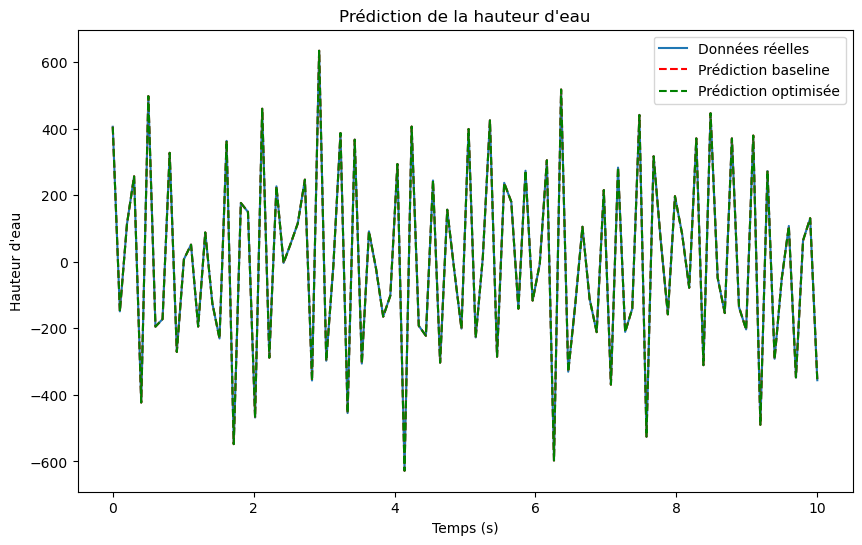

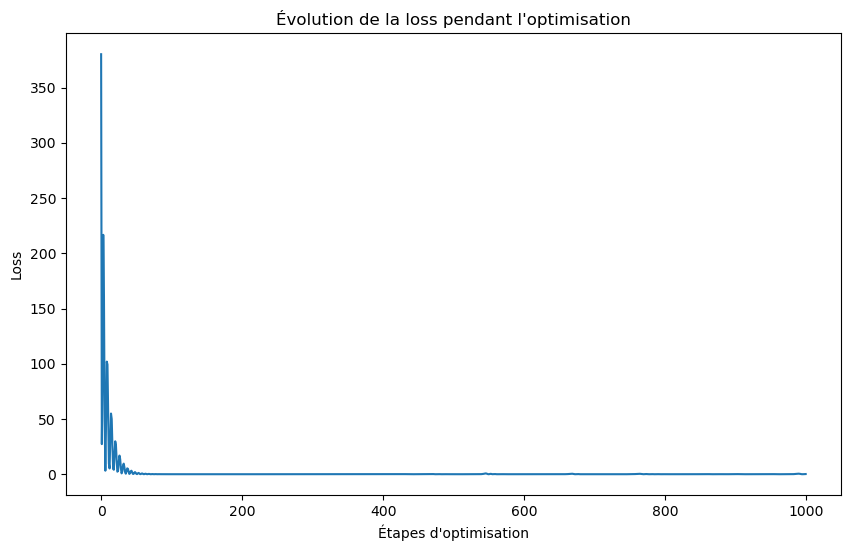

In [18]:
import jax
import jax.numpy as jnp
import numpy as np
from jax.scipy.optimize import minimize
import optax
import matplotlib.pyplot as plt

# Fonction de modèle avec une somme de cosinus basée sur les composantes de marée
def modele_marée(t, Z, *parametres):
    resultat = Z
    for i in range(0, len(parametres), 3):
        Ac = parametres[i]
        Wc = parametres[i + 1]
        Lc = parametres[i + 2]
        resultat += Ac * jnp.cos(Wc * t - Lc)
    return resultat

# Données des constituants NOAA
amplitudes = jnp.array([3.52, 0.88, 0.71, 2.74, 0.07, 1.51, 0.03, 0.11, 0.0, 0.03, 0.15, 0.0, 0.11, 0.08, 0.1])
frequences = jnp.array([28.984104, 30.0, 28.43973, 15.041069, 57.96821, 13.943035, 86.95232, 44.025173, 60.0, 57.423832, 28.512583, 90.0, 27.968208, 27.895355, 16.139101])
dephasages = jnp.array([138.7, 157.0, 113.2, 156.6, 96.4, 143.0, 337.9, 85.8, 0.0, 74.6, 126.7, 0.0, 12.8, 85.5, 199.7])

# Concaténer les données des constituants pour former les paramètres initiaux
params_initiaux = jnp.concatenate([amplitudes, frequences, dephasages])

# Baseline: calcul de la loss avec les constituants NOAA
def baseline_loss(params, t, target):
    prediction = modele_marée(t, 0, *params)
    return jnp.mean((prediction - target) ** 2)

# Définition de la loss pour l'optimisation
def loss(params, t, target):
    prediction = modele_marée(t, 0, *params)
    return jnp.mean((prediction - target) ** 2)

# Générer des points temporels pour la prédiction
temps_prediction = jnp.linspace(0, 10, 100)

# Générer des données de hauteur d'eau simulées pour la démonstration
hauteur_eau_simulee = modele_marée(temps_prediction, 0, *params_initiaux)

# Set up the optimizer
optimizer = optax.adam(0.01)  # Using Adam with a learning rate of 0.01
opt_state = optimizer.init(params_initiaux)

# Define a single optimization step
@jax.jit
def step(params, opt_state, t, target):
    grads = jax.grad(loss)(params, t, target)
    updates, opt_state = optimizer.update(grads, opt_state)
    new_params = optax.apply_updates(params, updates)
    return new_params, opt_state

# Run the optimization loop
num_steps = 1000
loss_history = []

for step_num in range(num_steps):
    params_initiaux, opt_state = step(params_initiaux, opt_state, temps_prediction, hauteur_eau_simulee)
    current_loss = loss(params_initiaux, temps_prediction, hauteur_eau_simulee)
    loss_history.append(current_loss)
    if step_num % 100 == 0:
        print(f"Step {step_num}, Loss: {current_loss}")

# Après l'optimisation
parametres_optimaux = params_initiaux

# Comparaison avant et après l'optimisation
print("Avant l'optimisation:")
for pred, targ in zip(modele_marée(temps_prediction, 0, *params_initiaux), hauteur_eau_simulee):
    print(f"Prédiction: {pred},target: {targ}")

print("\nAprès l'optimisation:")
for pred, targ in zip(modele_marée(temps_prediction, 0, *parametres_optimaux), hauteur_eau_simulee):
    print(f"Prédiction: {pred}, target: {targ}")

    
plt.figure(figsize=(10, 6))
plt.plot(temps_prediction, hauteur_eau_simulee, label='Données réelles')
plt.plot(temps_prediction, hauteur_eau_predite_baseline, label='Prédiction baseline', linestyle='--', color='red')
plt.plot(temps_prediction, hauteur_eau_predite_optimisee, label='Prédiction optimisée', linestyle='--', color='green')
plt.title('Prédiction de la hauteur d\'eau')
plt.xlabel('Temps (s)')
plt.ylabel('Hauteur d\'eau')
plt.legend()
plt.show()
# Plot de l'évolution de la loss
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('Évolution de la loss pendant l\'optimisation')
plt.xlabel('Étapes d\'optimisation')
plt.ylabel('Loss')
plt.show()


Étape 0, Loss: 2818.54833984375
Avant l'optimisation:
Prédiction: 405.50048828125, Target: 405.4936218261719
Prédiction: 139.3650360107422, Target: 139.15797424316406
Prédiction: -104.70305633544922, Target: -105.0008544921875
Prédiction: 1.8875713348388672, Target: 1.9362273216247559
Prédiction: 260.60699462890625, Target: 260.6664733886719
Prédiction: -71.21991729736328, Target: -71.13114929199219
Prédiction: -535.776123046875, Target: -535.7052001953125
Prédiction: -256.72027587890625, Target: -256.4250183105469
Prédiction: 110.95159912109375, Target: 111.38735961914062
Prédiction: -200.85903930664062, Target: -200.99996948242188
Prédiction: -520.7313232421875, Target: -521.126708984375
Prédiction: -119.72753143310547, Target: -119.67634582519531
Prédiction: 245.92633056640625, Target: 245.9941864013672
Prédiction: -98.39071655273438, Target: -98.5248794555664
Prédiction: -283.9166564941406, Target: -283.4957580566406
Prédiction: 14.308074951171875, Target: 15.318498611450195
Prédic

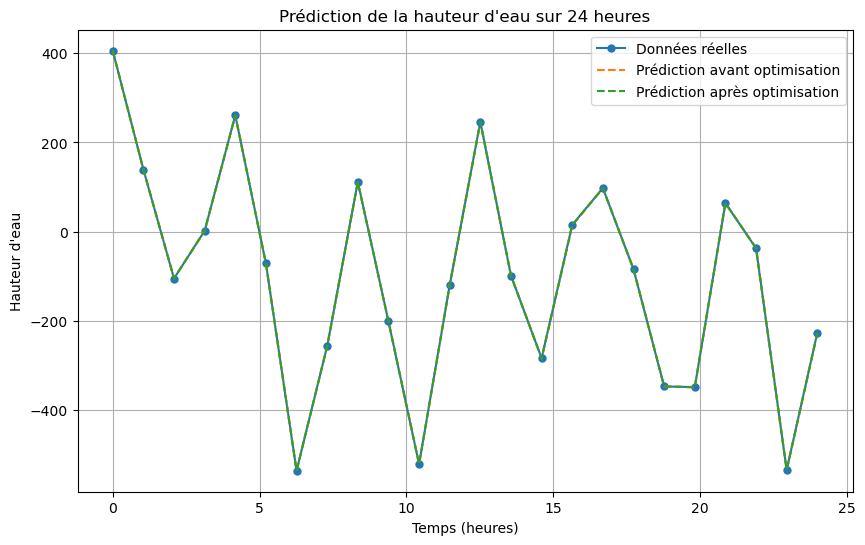

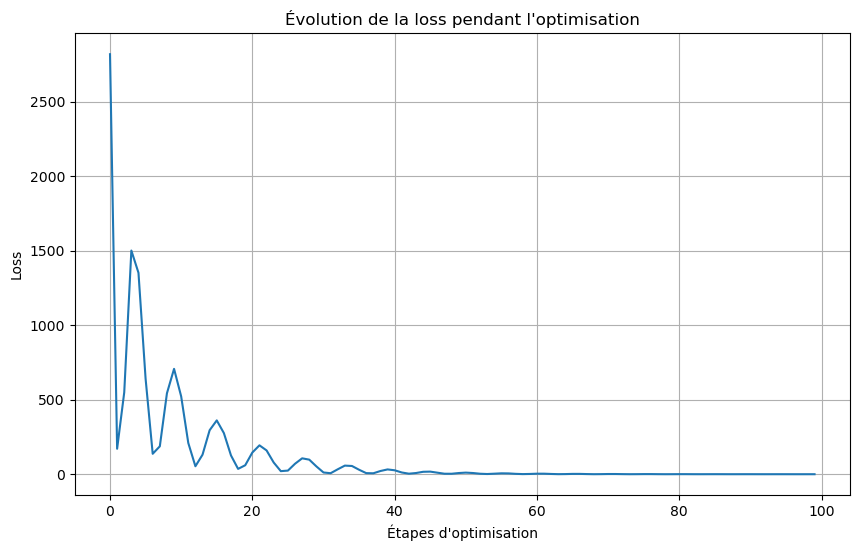

In [23]:
# Importations
import jax
import jax.numpy as jnp
import numpy as np
from jax.scipy.optimize import minimize
import optax
import matplotlib.pyplot as plt

# Définition de la fonction de modèle avec une somme de cosinus basée sur les composantes de marée
def modele_marée(t, Z, *parametres):
    resultat = Z
    for i in range(0, len(parametres), 3):
        Ac = parametres[i]
        Wc = parametres[i + 1]
        Lc = parametres[i + 2]
        resultat += Ac * jnp.cos(Wc * t - Lc)
    return resultat

# Données des constituants NOAA
amplitudes = jnp.array([3.52, 0.88, 0.71, 2.74, 0.07, 1.51, 0.03, 0.11, 0.0, 0.03, 0.15, 0.0, 0.11, 0.08, 0.1])
frequences = jnp.array([28.984104, 30.0, 28.43973, 15.041069, 57.96821, 13.943035, 86.95232, 44.025173, 60.0, 57.423832, 28.512583, 90.0, 27.968208, 27.895355, 16.139101])
dephasages = jnp.array([138.7, 157.0, 113.2, 156.6, 96.4, 143.0, 337.9, 85.8, 0.0, 74.6, 126.7, 0.0, 12.8, 85.5, 199.7])

# Concaténation des données des constituants pour former les paramètres initiaux
params_initiaux = jnp.concatenate([amplitudes, frequences, dephasages])

# Définition de la loss pour l'optimisation
def loss(params, t, target):
    prediction = modele_marée(t, 0, *params)
    return jnp.mean((prediction - target) ** 2)

# Génération des points temporels pour la prédiction (intervalles de 1 heure sur 24 heures)
temps_prediction = jnp.linspace(0, 24, 24)

# Génération des données de hauteur d'eau simulées pour la démonstration
hauteur_eau_simulee = modele_marée(temps_prediction, 0, *params_initiaux)

# Set up the optimizer
optimizer = optax.adam(0.01)  # Utilisation d'Adam avec un taux d'apprentissage de 0.01
opt_state = optimizer.init(params_initiaux)

# Définition d'une seule étape d'optimisation
@jax.jit
def step(params, opt_state, t, target):
    grads = jax.grad(loss)(params, t, target)
    updates, opt_state = optimizer.update(grads, opt_state)
    new_params = optax.apply_updates(params, updates)
    return new_params, opt_state

# Boucle d'optimisation
num_steps = 100
loss_history = []

for step_num in range(num_steps):
    params_initiaux, opt_state = step(params_initiaux, opt_state, temps_prediction, hauteur_eau_simulee)
    current_loss = loss(params_initiaux, temps_prediction, hauteur_eau_simulee)
    loss_history.append(current_loss)
    if step_num % 100 == 0:
        print(f"Étape {step_num}, Loss: {current_loss}")

# Après l'optimisation
parametres_optimaux = params_initiaux

# Comparaison avant et après l'optimisation
print("Avant l'optimisation:")
for pred, targ in zip(modele_marée(temps_prediction, 0, *params_initiaux), hauteur_eau_simulee):
    print(f"Prédiction: {pred}, Target: {targ}")

print("\nAprès l'optimisation:")
for pred, targ in zip(modele_marée(temps_prediction, 0, *parametres_optimaux), hauteur_eau_simulee):
    print(f"Prédiction: {pred}, Target: {targ}")

# Plot de la prédiction de la hauteur d'eau
# Plot de la prédiction de la hauteur d'eau
plt.figure(figsize=(10, 6))
plt.plot(temps_prediction, hauteur_eau_simulee, label='Données réelles', marker='o', linestyle='-', markersize=5)
plt.plot(temps_prediction, modele_marée(temps_prediction, 0, *params_initiaux), label='Prédiction avant optimisation', linestyle='--')
plt.plot(temps_prediction, modele_marée(temps_prediction, 0, *parametres_optimaux), label='Prédiction après optimisation', linestyle='--')
plt.title('Prédiction de la hauteur d\'eau sur 24 heures')
plt.xlabel('Temps (heures)')
plt.ylabel('Hauteur d\'eau')
plt.legend()
plt.grid(True)
plt.show()
# Plot de l'évolution de la loss
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('Évolution de la loss pendant l\'optimisation')
plt.xlabel('Étapes d\'optimisation')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
